In [17]:
# Part1 Data exploration
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datafile="air_data.txt"
resultfile='result_exploration.xls'
data=pd.read_csv(datafile, encoding="utf-8")
data.info()
explore=data.describe(percentiles=[], include='all').T
explore['null']=len(data)-explore['count']
explore=explore[['null','max','min']]
explore.columns=[u'null',u'max',u'min']
explore.index.name=u'attribues names'
explore.to_excel(resultfile,header=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
MEMBER_NO                  62988 non-null int64
FFP_DATE                   62988 non-null object
FIRST_FLIGHT_DATE          62988 non-null object
GENDER                     62985 non-null object
FFP_TIER                   62988 non-null int64
WORK_CITY                  60719 non-null object
WORK_PROVINCE              59740 non-null object
WORK_COUNTRY               62962 non-null object
AGE                        62568 non-null float64
LOAD_TIME                  62988 non-null object
FLIGHT_COUNT               62988 non-null int64
BP_SUM                     62988 non-null int64
EP_SUM_YR_1                62988 non-null int64
EP_SUM_YR_2                62988 non-null int64
SUM_YR_1                   62437 non-null float64
SUM_YR_2                   62850 non-null float64
SEG_KM_SUM                 62988 non-null int64
WEIGHTED_SEG_KM            62988 non-null float64
LAST_FLIGHT_

In [90]:
#Part2 data cleansing
#because the data missing quantity is not large, so I decided to delete the missing data
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datafile="air_data.txt"

data=pd.read_csv(datafile, encoding="utf-8")

data=data[(data['SUM_YR_1'].notnull())&(data['SUM_YR_2'].notnull())] #flight price can be 0
index1=(data['SUM_YR_1']!=0)|(data['SUM_YR_2']!=0)
index2=(data['SEG_KM_SUM']!=0)|(data['avg_discount']!=0)
data=data[index1|index2]
data.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
count,62299.000000,62299.000000,61884.000000,62299.000000,62299.000000,62299.0,62299.000000,62299.000000,62299.000000,62299.000000,...,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000
mean,31487.513347,4.103228,42.494926,11.941107,11025.168927,0.0,268.628036,5367.238885,5653.590507,17275.697315,...,1365.387582,1634.015618,1090.315575,12659.184545,6706.725421,0.489583,0.510417,0.519537,0.471629,2.746898
std,18187.867746,0.375609,9.888297,14.091654,16400.358390,0.0,1654.539833,8114.504667,8725.725867,21024.229954,...,7905.442525,8333.661560,5668.689334,20589.144781,12653.705434,0.316650,0.316650,0.337621,0.337049,7.389633
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15726.500000,4.000000,35.000000,3.000000,2585.000000,0.0,0.000000,1020.000000,833.000000,4852.000000,...,0.000000,0.000000,0.000000,2839.000000,759.000000,0.250000,0.285714,0.257691,0.179631,0.000000
50%,31476.000000,4.000000,41.000000,7.000000,5787.000000,0.0,0.000000,2810.000000,2820.000000,10163.000000,...,0.000000,0.000000,0.000000,6425.000000,2910.000000,0.500000,0.500000,0.511732,0.480056,0.000000
75%,47246.500000,4.000000,48.000000,15.000000,12952.000000,0.0,0.000000,6589.000000,6899.000000,21449.000000,...,0.000000,376.000000,0.000000,14432.500000,7576.500000,0.714286,0.750000,0.803747,0.729590,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,0.0,74460.000000,239560.000000,234188.000000,580717.000000,...,984938.000000,984938.000000,728282.000000,985572.000000,728282.000000,1.000000,1.000000,0.999989,0.999993,140.000000


In [38]:
#Part3 Data Standardization

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datafile="air_data.txt"
data=pd.read_csv(datafile, encoding="utf-8")
resultfile = 'scale_data.csv'

def reduction_data(data):
    data=data[['LOAD_TIME','FFP_DATE','FLIGHT_COUNT','avg_discount','SEG_KM_SUM','LAST_TO_END']]
    dloadtime=pd.to_datetime(data['LOAD_TIME'])   
    dffdate=pd.to_datetime(data['FFP_DATE'])
    recency=dloadtime-dffdate #calculate the sum of date
    temp_data=data.copy()
    
    temp_data['L']=recency.map(lambda x: x / np.timedelta64(30 * 24 * 60, 'm')) #change from date to month
    temp_data['R'] = data['LAST_TO_END']
    temp_data['F'] = data['FLIGHT_COUNT']
    temp_data['M'] = data['SEG_KM_SUM']
    temp_data['C'] = data['avg_discount']
    new_data = temp_data[['L', 'R', 'F', 'M', 'C']]
    return new_data         

new_data=reduction_data(data)
#print, and realize the the difference between data are too huge, so it require standardization

ascore_data=(new_data-new_data.mean(axis=0))/(new_data.std(axis=0))
#Rename the columns
ascore_data.columns=['ZL','ZR','ZF','ZM','ZC']
#save the data after standardization
ascore_data.to_csv(resultfile,index=False)
ascore_data.describe()

,ZL,ZR,ZF,ZM,ZC
count,6.298800e+04,6.298800e+04,6.298800e+04,6.298800e+04,6.298800e+04
mean,7.650855e-15,-5.332850e-15,5.933323e-14,2.638082e-15,-2.758702e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.321967e+00,-9.526601e-01,-7.003405e-01,-7.993895e-01,-3.891339e+00
25%,-8.887871e-01,-8.003390e-01,-6.291635e-01,-5.904761e-01,-5.908571e-01
50%,-2.537713e-01,-3.705760e-01,-3.444552e-01,-3.401523e-01,-5.231944e-02
75%,8.191459e-01,4.998302e-01,2.249612e-01,1.978628e-01,4.741404e-01
max,2.303997e+00,3.018568e+00,1.431802e+01,2.688790e+01,4.198115e+00


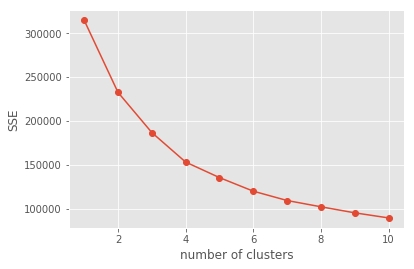

In [114]:
#Part 4 Model Construction Using K-means
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inputfile= 'scale_data.csv'
data=pd.read_csv(inputfile,encoding='utf-8')
#using Elbow method to find the number of clusters
d =[]
for i in range(1,11):
    model = KMeans(n_clusters = i,)
    model.fit(data)
    d.append(model.inertia_)

#plot
plt.plot(range(1,11),d,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.show()

#can't perceive a evident turning point
k=5 #cluster number, because the American Airlines have 5 levels of flight ticker price

kmodel=KMeans(n_clusters=k,n_jobs=4) # my model
kmodel.fit(data)   # train model
r1= pd.Series(kmodel.labels_)

r1=r1.value_counts()  #sample number calculation
r2=pd.DataFrame(kmodel.cluster_centers_)

r=pd.concat([r2,r1],axis=1)  #combine r1&r2 columns together
r.columns=list(data.columns)+['total number']
r.index.name='groups'
r.index=([u'CG1',u'CG2',u'CG3',u'CG4',u'CG5'])

r.to_excel('result_cluster.xls')

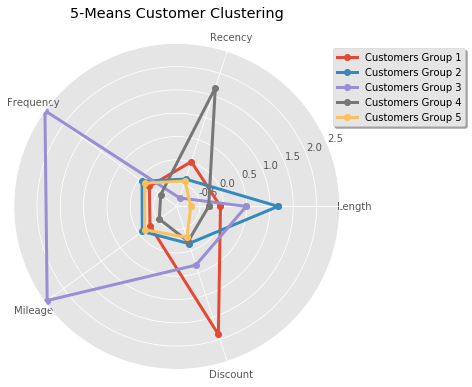

In [115]:
#Part 5 Radar Plotting
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import pi

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False
#label
labels=np.array(['Length','Recency','Frequency','Mileage','Discount'])
#label number
dataLenth=5
#finish self-design

angles=np.linspace(0,2*np.pi,5,endpoint=False)
data=pd.concat([r2,r2.iloc[:,0]],axis=1)
angles=np.concatenate((angles,[angles[0]]))
                
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,polar=True)

for i in range(0,5):
    j=i+1
    ax.plot(angles,data.iloc[i,:],'o-',linewidth=3,label="Customers Group %d" % (i + 1))
    
ax.set_thetagrids(angles*180/np.pi,labels)
ax.set_title("5-Means Customer Clustering",va='bottom')
ax.set_rlim(-1,2.5)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1.0),ncol=1,
                   fancybox=True,shadow=True)
plt.show()

                

In [ ]:
#Customer Group 1：total number 5371，High Discount attributes(high purchasing power)--- Key Developing Customers
#Customer Group 2：total number 15673，High Length(Loyal Customers) ---- Key Maintaining Customers
#Customer Group 3：total number 5560，Extremely high Frequency and Mileage --- Best Customers
#Customer Group 4：total number 12296, High Recency --- Low Value Customers 
#Customer Group 5，total number 24088, No high attributes--- Regular Customers
#Summary: Customer Value Rank: CG3>CG1>CG2>CG5>CG4
#Given the five level of ticket price: $2084、$918、$599、$439、$379
#We find valuable customer only account for about 16% of all customers
#Apply more $439、$379 to these two groups

#--------END-----------